# Economic change of NZ associate with the World

### Group Project
### Group member: yuting zhang, 

In [4]:
library(tidyverse)#load tidyverse libraries
library(tidyr) #tidy messy data
library(readxl)#read excel files
library(readr) #read rectangular text data 
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(data.table)#data.table data types and data handling
library(ggplot2)#declaratively creating graphics
library(xml2) # makes it easier to work with HTML and XML from R
library(png)
library(grid)

### Export Education 

In [5]:
#read the whole data about the education fee file to the R and genaral view them
"Export-Education-Levy-Full-Year-Statistics.xlsx" %>%
  read_excel() %>%
  glimpse() # Expect a lot of red!

New names:
• `` -> `...2`


Rows: 14
Columns: 2
$ `Table Index` <chr> NA, "Levy", "Tuition Fee", "EFTS", "Average Tuition Fee"…
$ ...2          <chr> NA, "Export Education Levy (GST Excl) collected by secto…


In [6]:
#read the tuition fee data from the sheet3 
Tuition_fee<- read_excel('Export-Education-Levy-Full-Year-Statistics.xlsx',sheet=3)
Tuition_fee# view the tible how it looks like
# make a new data frame of Tertiary education Tution fee form the whole data file
new_data_frame<- Tuition_fee[7:18,2:ncol(Tuition_fee)]
new_data_frame

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`


Back to index,...2,...3,...4,...5,...6,...7,...8,...9,...10,⋯,...15,...16,...17,...18,...19,...20,...21,...22,...23,...24
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Tuition fee income (GST Excl) to providers 2003-2022,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,Education sector,Provider type,NA,2003,2004,2005,2006,2007,2008,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NA,Schools,Primary/Intermediate,NA,31725917,26814276,21035811,18620215,22473784,18569834,⋯,10375235,11517692,12355560,15273509,18108884,21010271,23930159,18381379,8583484,4840522
NA,NA,Secondary/Composite/Special,NA,135093732,120920345,95366658,85778661,95808842,100078954,⋯,111714804,119413408,131685670,148448711,162884821,172922201,177673487,144524255,84295093,58913691
NA,Total schools,NA,NA,166819649,147734620,116402468,104398876,118282626,118648788,⋯,122090039,130931100,144041231,163722220,180993706,193932471,201603646,162905634,92878576,63754213
NA,Tertiary education organisations,Government-funded providers,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,Universities,266917015,343996835,348240216,311663309,273710142,251075934,⋯,327157178,343439180,371787900,404197458,454669393,513376356,579705166,479910061,348554390,319145452
NA,NA,NA,Te Pūkenga,89242215,94757148,85882476,70092381,64391997,67114850,⋯,99363496,117819336,166014422,185286787,189945762,185829003,178376971,149614092,67536848,40488366


...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,⋯,...15,...16,...17,...18,...19,...20,...21,...22,...23,...24
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tertiary education organisations,Government-funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Universities,266917015,343996835,348240216,311663309,273710142,251075934,266969203,⋯,327157178,343439180,371787900,404197458,454669393,513376356,579705166,479910061,348554390,319145452
NA,NA,Te Pūkenga,89242215,94757148,85882476,70092381,64391997,67114850,76192684,⋯,99363496,117819336,166014422,185286787,189945762,185829003,178376971,149614092,67536848,40488366
NA,NA,Wānanga,20000,49500,62050,0,0,0,0,⋯,15000,15000,0,0,0,0,0,0,0,26400
NA,NA,Private training establishments,72954831,65168560,60561254,51331340,47346621,59445154,72572659,⋯,92846636,124153469,144545338,134319217,125011274,121930942,110810052,113921552,68440991,49015359
NA,Total government-funded providers,NA,429134061,503972043,494745996,433087030,385448760,377635938,415734546,⋯,519382310,585426985,682347660,723803462,769626429,821394313,868892189,743445705,484532229,408675577
NA,Non-government funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Private training establishments,135691526,105295706,79959556,78064989,84924054,96525068,112602804,⋯,97550453,145204483,186890677,181035460,147499423,141915565,135273236,54786300,16340290,10873744
NA,NA,Subsidiary providers,14688116,8812927,6531365,6261029,8245890,9523293,14000012,⋯,17081315,22300708,16338756,15471918,11804338,8616649,3951594,1835389,264194,0


In [7]:
# Rename the column names for the new tables
colnames(new_data_frame) <- (c("f1","f2","f3","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"))
new_data_frame
# select the Government funded part 
 Government_funded <- new_data_frame %>% slice(1:5) %>% select(-c(1, 2)) %>% slice(2:5)
 Government_funded
# Transpose the Data Frame which the type of providers as the key to long data frame for Government_funded 
long_Government_funded<-  Government_funded %>%
  gather(key = f3 , value = "Tuition") %>% rename(Times = f3)
# Create a vector with the group of the names of the providers to repeat
group_of_providers<- c("Universities","Te Pūkenga","Wānanga"," Private training establishments")
Providers <- rep(group_of_providers, times = 20)# repeat 20 times cause we can see that from 2003 to 2022 is 20 years
long_Government_funded$Providers<- Providers# add the provider coulum to the long data frame
long_Government_funded# show the final result of the long data frame


f1,f2,f3,2003,2004,2005,2006,2007,2008,2009,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tertiary education organisations,Government-funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Universities,266917015,343996835,348240216,311663309,273710142,251075934,266969203,⋯,327157178,343439180,371787900,404197458,454669393,513376356,579705166,479910061,348554390,319145452
NA,NA,Te Pūkenga,89242215,94757148,85882476,70092381,64391997,67114850,76192684,⋯,99363496,117819336,166014422,185286787,189945762,185829003,178376971,149614092,67536848,40488366
NA,NA,Wānanga,20000,49500,62050,0,0,0,0,⋯,15000,15000,0,0,0,0,0,0,0,26400
NA,NA,Private training establishments,72954831,65168560,60561254,51331340,47346621,59445154,72572659,⋯,92846636,124153469,144545338,134319217,125011274,121930942,110810052,113921552,68440991,49015359
NA,Total government-funded providers,NA,429134061,503972043,494745996,433087030,385448760,377635938,415734546,⋯,519382310,585426985,682347660,723803462,769626429,821394313,868892189,743445705,484532229,408675577
NA,Non-government funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Private training establishments,135691526,105295706,79959556,78064989,84924054,96525068,112602804,⋯,97550453,145204483,186890677,181035460,147499423,141915565,135273236,54786300,16340290,10873744
NA,NA,Subsidiary providers,14688116,8812927,6531365,6261029,8245890,9523293,14000012,⋯,17081315,22300708,16338756,15471918,11804338,8616649,3951594,1835389,264194,0


f3,2003,2004,2005,2006,2007,2008,2009,2010,2011,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Universities,266917015,343996835,348240216,311663309,273710142,251075934,266969203,284008792,292715800,⋯,327157178,343439180,371787900,404197458,454669393,513376356,579705166,479910061,348554390,319145452
Te Pūkenga,89242215,94757148,85882476,70092381,64391997,67114850,76192684,86136292,90519075,⋯,99363496,117819336,166014422,185286787,189945762,185829003,178376971,149614092,67536848,40488366
Wānanga,20000,49500,62050,0,0,0,0,0,0,⋯,15000,15000,0,0,0,0,0,0,0,26400
Private training establishments,72954831,65168560,60561254,51331340,47346621,59445154,72572659,77250392,99312822,⋯,92846636,124153469,144545338,134319217,125011274,121930942,110810052,113921552,68440991,49015359


Times,Tuition,Providers
<chr>,<dbl>,<chr>
2003,266917015,Universities
2003,89242215,Te Pūkenga
2003,20000,Wānanga
2003,72954831,Private training establishments
2004,343996835,Universities
2004,94757148,Te Pūkenga
2004,49500,Wānanga
2004,65168560,Private training establishments
2005,348240216,Universities


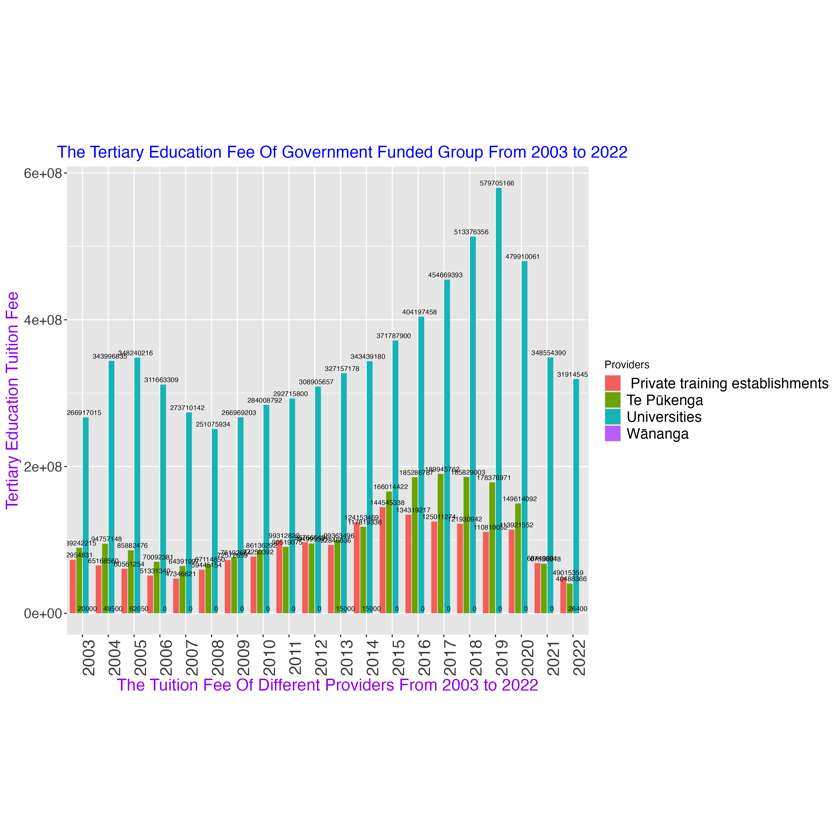

In [8]:
# plot the Tertiary education fee group of government funded 
# Create a ggplot object with your data
Tertiary_education_fee_funded <- ggplot(data = long_Government_funded,
  aes(x = Times, y = Tuition, fill = Providers)) +

  # Create a bar plot using geom_col with position_dodge
  geom_col(position = position_dodge(width = 1)) +  # Increase the width value

  # Add a plot title
  ggtitle("The Tertiary Education Fee Of Government Funded Group From 2003 to 2022") +

  # Add text labels to the bars using geom_text
  geom_text(aes(label = Tuition), position = position_dodge(width = 0.5), size = 2.5, vjust = -0.5) +

  # Customize the appearance of the plot using theme
  theme(
    plot.title = element_text(size = 17, hjust = 0.2, color = "blue"), # Set title properties
    axis.title = element_text(size = 17, color = "purple"), # Set axis title properties
    axis.text.x = element_text(size = 17, angle = 90, hjust = 1), # Customize X-axis text
    axis.text.y = element_text(size = 14, hjust = 1), # Customize Y-axis text
    legend.text = element_text(size = 15, face = "plain") # Customize legend text
  ) +

  # Customize X and Y axis labels
  xlab("The Tuition Fee Of Different Providers From 2003 to 2022") + # X-axis label
  ylab("Tertiary Education Tuition Fee") # Y-axis label

# Save the  plot with a larger width (adjust 'width' as needed)
ggsave("plot1.png", plot = Tertiary_education_fee_funded, width = 12, height = 8)

# Specify the file name of the saved PNG plot
plot1 <- "plot1.png"

# Read the PNG image
img <- readPNG(plot1)

# Display the saved plot
grid.raster(img)

Times,Total_Tuition
<chr>,<dbl>
2003,429134061
2004,503972043
2005,494745996
2006,433087030
2007,385448760
2008,377635938
2009,415734546
2010,447395476
2011,482547697


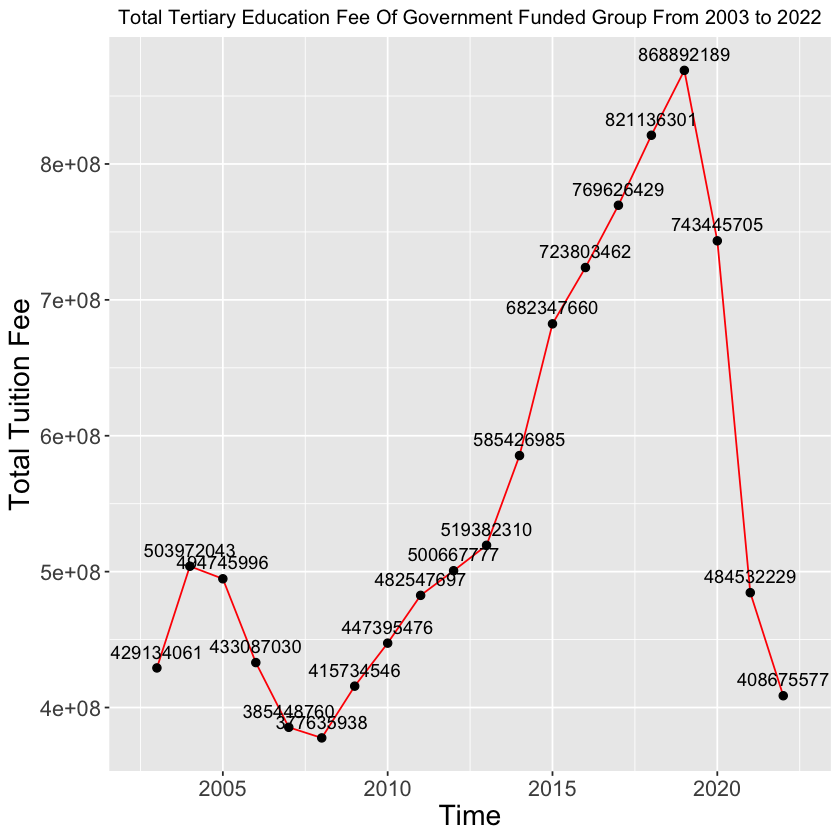

In [9]:
# Calculate the total tuition by year
total_tuition_by_year <- long_Government_funded %>%
  group_by(Times) %>%
  summarise(Total_Tuition = sum(Tuition))
total_tuition_by_year
# Create a ggplot object for the line plot
 line_plot<- total_tuition_by_year %>% 
        ggplot(aes(x=as.numeric(Times), y=Total_Tuition)) + # here is a very important thing to make "Times" as numeric that can show the trend line in the plot
        ggtitle('Total Tertiary Education Fee Of Government Funded Group From 2003 to 2022') + 
        geom_line(position = position_dodge(0.2), color="red") +
        geom_point(position = position_dodge(0.2), size=2) +
        geom_text(aes(label= Total_Tuition), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=12), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(size=13),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Total Tuition Fee")
line_plot
# Save the  plot with a larger width (adjust 'width' as needed)
ggsave("plot2.png", plot =line_plot, width = 12, height = 8)


In [10]:
# Commend: use the similarty procedure to make plot of non-government funded group 

In [11]:
# view again
new_data_frame

f1,f2,f3,2003,2004,2005,2006,2007,2008,2009,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tertiary education organisations,Government-funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Universities,266917015,343996835,348240216,311663309,273710142,251075934,266969203,⋯,327157178,343439180,371787900,404197458,454669393,513376356,579705166,479910061,348554390,319145452
NA,NA,Te Pūkenga,89242215,94757148,85882476,70092381,64391997,67114850,76192684,⋯,99363496,117819336,166014422,185286787,189945762,185829003,178376971,149614092,67536848,40488366
NA,NA,Wānanga,20000,49500,62050,0,0,0,0,⋯,15000,15000,0,0,0,0,0,0,0,26400
NA,NA,Private training establishments,72954831,65168560,60561254,51331340,47346621,59445154,72572659,⋯,92846636,124153469,144545338,134319217,125011274,121930942,110810052,113921552,68440991,49015359
NA,Total government-funded providers,NA,429134061,503972043,494745996,433087030,385448760,377635938,415734546,⋯,519382310,585426985,682347660,723803462,769626429,821394313,868892189,743445705,484532229,408675577
NA,Non-government funded providers,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Private training establishments,135691526,105295706,79959556,78064989,84924054,96525068,112602804,⋯,97550453,145204483,186890677,181035460,147499423,141915565,135273236,54786300,16340290,10873744
NA,NA,Subsidiary providers,14688116,8812927,6531365,6261029,8245890,9523293,14000012,⋯,17081315,22300708,16338756,15471918,11804338,8616649,3951594,1835389,264194,0


In [12]:
# select the non-Government funded part 
 non_Government_funded <- new_data_frame %>% slice(8:9) %>% select(-c(1, 2))
 non_Government_funded
# Transpose the Data Frame which the type of providers as the key to long data frame for non_Government_funded 
long_non_Government_funded<-  non_Government_funded %>%
  gather(key = f3 , value = "Tuition") %>% rename(Times = f3)
# Create a vector with the group of the names of the providers to repeat
group_of_providers<- c("Private training establishments","Subsidiary providers")
Providers <- rep(group_of_providers, times = 20)# repeat 20 times cause we can see that from 2003 to 2022 is 20 years
long_non_Government_funded$Providers<- Providers# add the provider coulum to the long data frame
long_non_Government_funded# show the final result of the long data frame

f3,2003,2004,2005,2006,2007,2008,2009,2010,2011,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Private training establishments,135691526,105295706,79959556,78064989,84924054,96525068,112602804,121171916,115501778,⋯,97550453,145204483,186890677,181035460,147499423,141915565,135273236,54786300,16340290,10873744
Subsidiary providers,14688116,8812927,6531365,6261029,8245890,9523293,14000012,15102899,16827424,⋯,17081315,22300708,16338756,15471918,11804338,8616649,3951594,1835389,264194,0


Times,Tuition,Providers
<chr>,<dbl>,<chr>
2003,135691526,Private training establishments
2003,14688116,Subsidiary providers
2004,105295706,Private training establishments
2004,8812927,Subsidiary providers
2005,79959556,Private training establishments
2005,6531365,Subsidiary providers
2006,78064989,Private training establishments
2006,6261029,Subsidiary providers
2007,84924054,Private training establishments


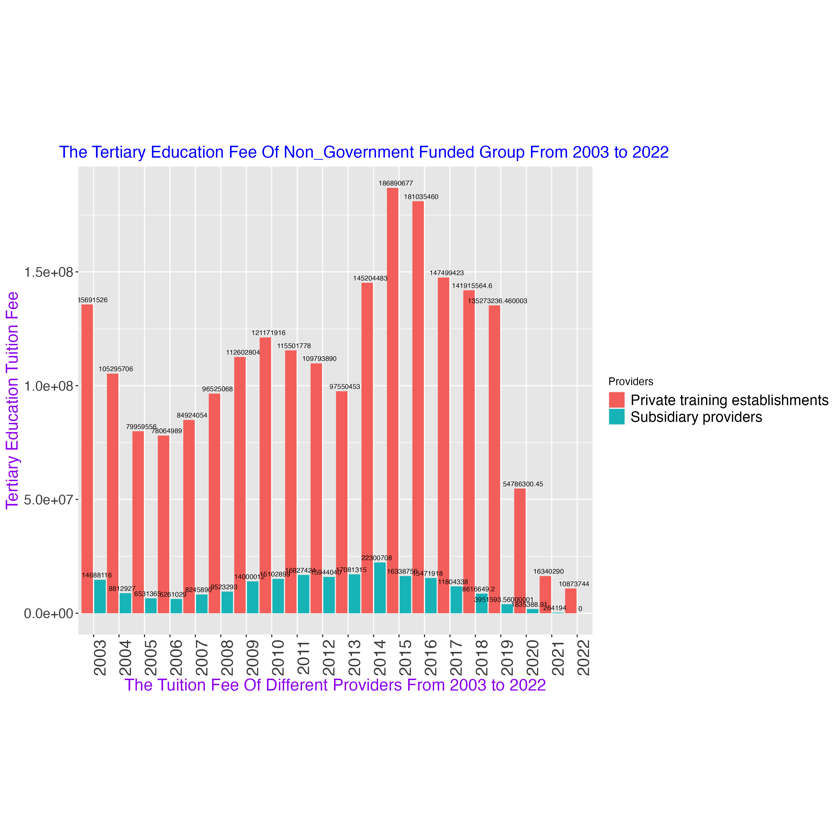

In [13]:
# plot the Tertiary education fee group of non_government funded 
# Create a ggplot object with your data
Tertiary_education_fee_non_funded <- ggplot(data = long_non_Government_funded,
  aes(x = Times, y = Tuition, fill = Providers)) +

  # Create a bar plot using geom_col with position_dodge
  geom_col(position = position_dodge(width = 1)) +  # Increase the width value

  # Add a plot title
  ggtitle("The Tertiary Education Fee Of Non_Government Funded Group From 2003 to 2022") +

  # Add text labels to the bars using geom_text
  geom_text(aes(label = Tuition), position = position_dodge(width = 0.5), size = 2.5, vjust = -0.5) +

  # Customize the appearance of the plot using theme
  theme(
    plot.title = element_text(size = 17, hjust = 0.2, color = "blue"), # Set title properties
    axis.title = element_text(size = 17, color = "purple"), # Set axis title properties
    axis.text.x = element_text(size = 17, angle = 90, hjust = 1), # Customize X-axis text
    axis.text.y = element_text(size = 14, hjust = 1), # Customize Y-axis text
    legend.text = element_text(size = 15, face = "plain") # Customize legend text
  ) +

  # Customize X and Y axis labels
  xlab("The Tuition Fee Of Different Providers From 2003 to 2022") + # X-axis label
  ylab("Tertiary Education Tuition Fee") # Y-axis label

# Save the  plot with a larger width (adjust 'width' as needed)
ggsave("plot3.png", plot = Tertiary_education_fee_non_funded, width = 12, height = 8)

# Specify the file name of the saved PNG plot
plot3 <- "plot3.png"

# Read the PNG image
img <- readPNG(plot3)

# Display the saved plot
grid.raster(img)

Times,Total_Tuition
<chr>,<dbl>
2003,150379642
2004,114108633
2005,86490921
2006,84326018
2007,93169944
2008,106048361
2009,126602816
2010,136274815
2011,132329202


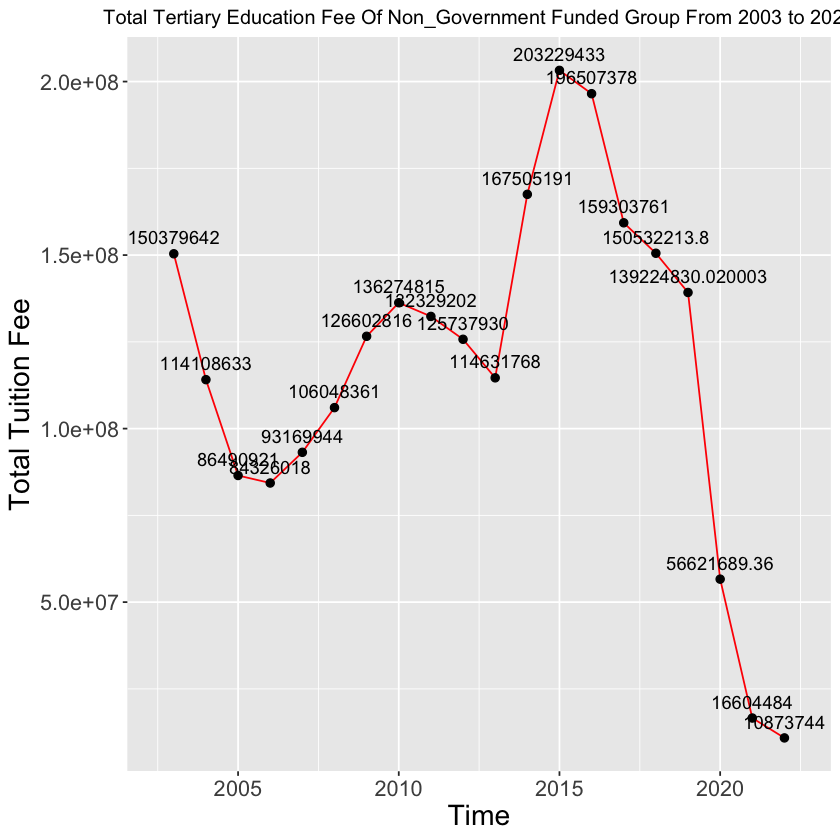

In [14]:
# Calculate the total tuition by year
total_tuition_by_year <- long_non_Government_funded %>%
  group_by(Times) %>%
  summarise(Total_Tuition = sum(Tuition))
total_tuition_by_year
# Create a ggplot object for the line plot
 line_plot<- total_tuition_by_year %>% 
        ggplot(aes(x=as.numeric(Times), y=Total_Tuition)) + # here is a very important thing to make "Times" as numeric that can show the trend line in the plot
        ggtitle('Total Tertiary Education Fee Of Non_Government Funded Group From 2003 to 2022') + 
        geom_line(position = position_dodge(0.2), color="red") +
        geom_point(position = position_dodge(0.2), size=2) +
        geom_text(aes(label= Total_Tuition), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=12), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(size=13),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Total Tuition Fee")
line_plot
# Save the  plot with a larger width (adjust 'width' as needed)
ggsave("plot4.png", plot =line_plot, width = 12, height = 8)


In [15]:
# Task2 find out the change of International fee-paying students by region of citizenship from 2013 to 2022

In [16]:
# read the tuition fee by oversea region data from the sheet9

In [17]:
region_fee<- read_excel('Export-Education-Levy-Full-Year-Statistics.xlsx',sheet=11)
region_fee# view the tible how it looks like

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


Back to index,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,International fee-paying students by region of citizenship 2013-2022,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,Education Sector,Provider type,NA,World region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
NA,Schools,Primary,NA,Africa,10,15,5,15,15,5,10,15,10,15
NA,NA,NA,NA,Asia,2200,2275,2355,2720,3395,4220,4905,2200,855,670
NA,NA,NA,NA,Europe,95,90,95,100,125,130,165,120,50,65
NA,NA,NA,NA,Latin America and the Caribbean,15,5,20,35,50,45,55,25,5,10
NA,NA,NA,NA,Northern America,15,10,30,20,35,35,70,60,35,35
NA,NA,NA,NA,Oceania,10,10,10,15,15,25,20,20,10,5


In [18]:
# make a new data frame of Tertiary education Tution fee of Total government-funded providers form the whole data file
funded_frame<- region_fee[49:54,4:ncol(region_fee)]
funded_frame
# Rename the column names for the new tables
colnames(funded_frame) <- (c("f1","region","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"))
funded_frame

...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total government-funded providers,Africa,380,355,415,575,580,570,580,565,460,265
NA,Asia,34140,39525,47110,49430,47750,47645,47920,36970,23995,19395
NA,Europe,2400,2245,2235,2130,2015,2065,1840,1290,945,645
NA,Latin America and the Caribbean,735,960,1110,945,1055,1325,1035,770,570,355
NA,Northern America,2000,1930,2050,2180,2445,2435,2425,1550,585,630
NA,Oceania,1245,1250,1240,1090,1120,970,980,875,640,575


f1,region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total government-funded providers,Africa,380,355,415,575,580,570,580,565,460,265
NA,Asia,34140,39525,47110,49430,47750,47645,47920,36970,23995,19395
NA,Europe,2400,2245,2235,2130,2015,2065,1840,1290,945,645
NA,Latin America and the Caribbean,735,960,1110,945,1055,1325,1035,770,570,355
NA,Northern America,2000,1930,2050,2180,2445,2435,2425,1550,585,630
NA,Oceania,1245,1250,1240,1090,1120,970,980,875,640,575


In [19]:
# Convert data to long format for ggplot
data_long <- tidyr::pivot_longer(funded_frame, cols = `2013`:`2022`, names_to = "Year", values_to = "Value")
data_long %>% select(2:4)

region,Year,Value
<chr>,<chr>,<dbl>
Africa,2013,380
Africa,2014,355
Africa,2015,415
Africa,2016,575
Africa,2017,580
Africa,2018,570
Africa,2019,580
Africa,2020,565
Africa,2021,460


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


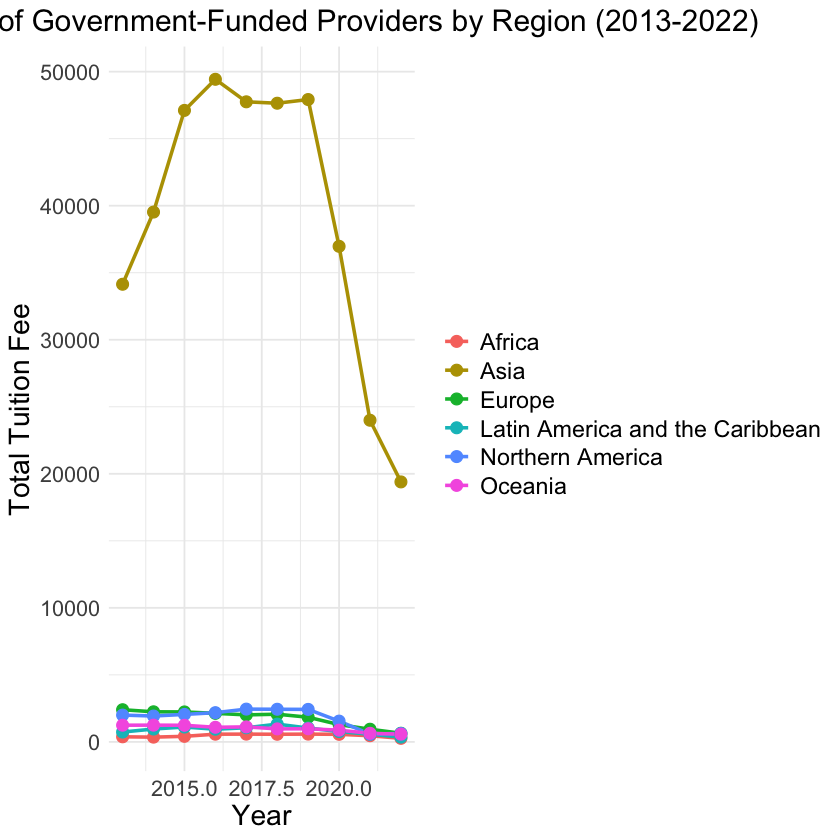

In [20]:
# Create the line plot with points
six_line_plot <- ggplot(data_long, aes(x = as.numeric(Year), y = Value, group = region, color = region)) +
  geom_line(size = 1) +
  geom_point(size = 3) +  # Add points and customize their size
  ggtitle("Total Tuition Fee of Government-Funded Providers by Region (2013-2022)") +
  xlab("Year") +
  ylab("Total Tuition Fee") +
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.title = element_text(size = 17),
    axis.text.x = element_text(size = 13),
    axis.text.y = element_text(size = 13),
    legend.text = element_text(size = 14),
      # Set background color to white
    plot.background = element_rect(fill = "white", color = NA)
  )
# Show the plot
six_line_plot
# Save the plot with a larger width (adjust 'width' as needed)
ggsave("plot5.png", plot = six_line_plot, width = 16, height = 6)


In [21]:
# similarity  procedure for Non_Government funded providers 
# make a new data frame of Tertiary education Tution fee of Total Non_government-funded providers form the whole data file
non_funded_frame<- region_fee[71:76,4:ncol(region_fee)]
non_funded_frame
# Rename the column names for the new tables
colnames(non_funded_frame) <- (c("f1","region","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"))
non_funded_frame

...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total non-government funded providers,Africa,45,55,45,40,40,100,295,50,35,15
NA,Asia,25090,30960,36755,39310,31980,24120,22040,8260,3145,1810
NA,Europe,4620,4720,4675,5240,4535,4075,3495,1180,160,190
NA,Latin America and the Caribbean,2250,2835,3840,4665,5465,5470,5165,2005,560,240
NA,Northern America,100,90,105,90,95,105,95,65,5,5
NA,Oceania,325,445,495,515,380,325,325,125,100,50


f1,region,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total non-government funded providers,Africa,45,55,45,40,40,100,295,50,35,15
NA,Asia,25090,30960,36755,39310,31980,24120,22040,8260,3145,1810
NA,Europe,4620,4720,4675,5240,4535,4075,3495,1180,160,190
NA,Latin America and the Caribbean,2250,2835,3840,4665,5465,5470,5165,2005,560,240
NA,Northern America,100,90,105,90,95,105,95,65,5,5
NA,Oceania,325,445,495,515,380,325,325,125,100,50


In [22]:
# Convert data to long format for ggplot
non_data_long <- tidyr::pivot_longer(non_funded_frame, cols = `2013`:`2022`, names_to = "Year", values_to = "Value")
non_data_long %>% select(2:4)

region,Year,Value
<chr>,<chr>,<dbl>
Africa,2013,45
Africa,2014,55
Africa,2015,45
Africa,2016,40
Africa,2017,40
Africa,2018,100
Africa,2019,295
Africa,2020,50
Africa,2021,35


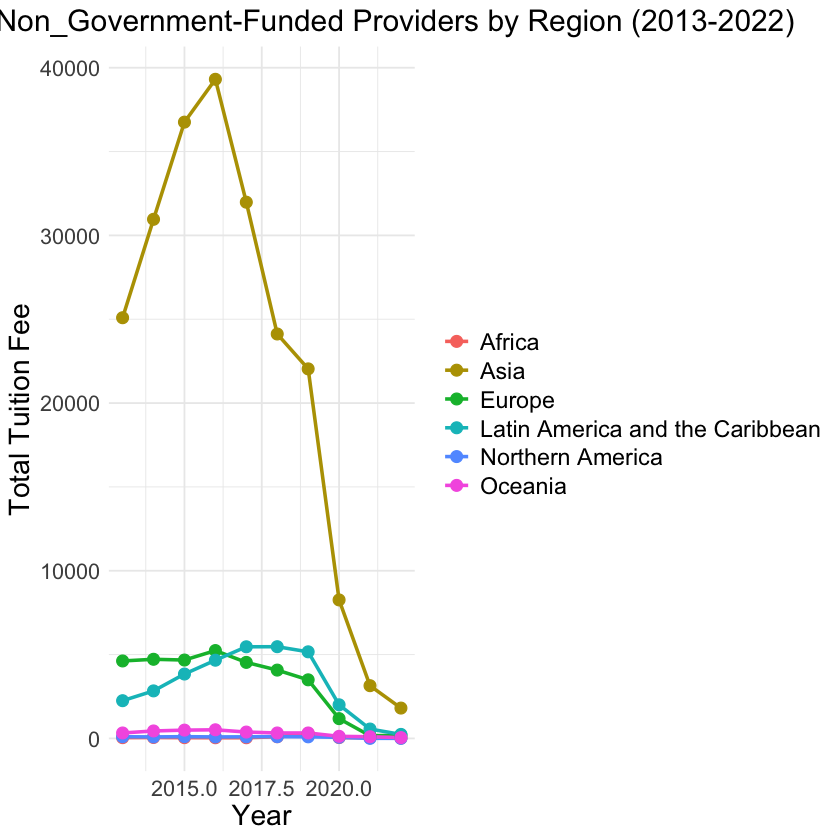

In [23]:
# Create the line plot with points
six_line_plot2 <- ggplot(non_data_long, aes(x = as.numeric(Year), y = Value, group = region, color = region)) +
  geom_line(size = 1) +
  geom_point(size = 3) +  # Add points and customize their size
  ggtitle("Total Tuition Fee of Non_Government-Funded Providers by Region (2013-2022)") +
  xlab("Year") +
  ylab("Total Tuition Fee") +
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.title = element_blank(),
    plot.title = element_text(hjust = 0.5, size = 18),
    axis.title = element_text(size = 17),
    axis.text.x = element_text(size = 13),
    axis.text.y = element_text(size = 13),
    legend.text = element_text(size = 14),
      # Set background color to white
    plot.background = element_rect(fill = "white", color = NA)
  )
# Show the plot
six_line_plot2
# Save the plot with a larger width (adjust 'width' as needed)
ggsave("plot6.png", plot = six_line_plot2, width = 16, height = 6)


In [24]:
# Extra: try to shw the total tuition fee of Tertiary education organisations(Government funded and nonfunded) on NZ map

In [25]:
#import the data of total tuition fee by region in NZ for 2022 
nz_region_fee<- read_excel('Export-Education-Levy-Full-Year-Statistics.xlsx',sheet=9)
nz_region_fee# view the tible how it looks like

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`


Back to index,...2,...3,...4,...5,...6,...7,...8,...9,...10,⋯,...15,...16,...17,...18,...19,...20,...21,...22,...23,...24
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,"International fee-paying students by region and sector, 2013-2022",NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,Education Sector,Provider Type,NA,Year,Northland Region,Auckland Region,Waikato Region,Bay of Plenty Region,Gisborne Region,⋯,West Coast Region,Canterbury Region,Otago Region,Southland Region,Tasman Region,Nelson Region,Marlborough Region,Extramural,Other,Total
NA,Schools,Primary/Intermediate,NA,2013,25,1570,120,215,0,⋯,0,190,65,15,20,10,0,0,0,2345
NA,NA,NA,NA,2014,20,1615,120,250,0,⋯,0,180,45,20,30,10,0,0,0,2405
NA,NA,NA,NA,2015,25,1725,150,250,0,⋯,0,130,35,25,15,30,0,0,0,2520
NA,NA,NA,NA,2016,25,1945,190,315,0,⋯,0,180,35,15,5,30,0,0,0,2905
NA,NA,NA,NA,2017,50,2380,215,385,0,⋯,0,280,80,25,15,35,0,0,0,3640
NA,NA,NA,NA,2018,45,2785,315,425,0,⋯,0,415,165,35,30,40,0,0,0,4455


In [26]:
# we just need the row of the total tuition fee for tertiary education organisations in 2022
totoal_tuition_fee<- nz_region_fee %>% slice(113) %>% select(5:23)
totoal_tuition_fee
colnames(totoal_tuition_fee)<- c("year","Northland Region","Auckland Region","Waikato Region","Bay of Plenty Region","Gisborne Region","Hawkes Bay Region","Taranaki Region","Manawatu-Wanganui Region","Wellington Region","West Coast Region","Canterbury Region","Otago Region","Southland Region","Tasman Region","Nelson Region","Marlborough Region","Extramural","Other")
totoal_tuition_fee

...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15,...16,...17,...18,...19,...20,...21,...22,...23
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022,145,14755,2110,925,5,290,540,1380,2365,10,3295,1075,340,55,235,15,4585,115


year,Northland Region,Auckland Region,Waikato Region,Bay of Plenty Region,Gisborne Region,Hawkes Bay Region,Taranaki Region,Manawatu-Wanganui Region,Wellington Region,West Coast Region,Canterbury Region,Otago Region,Southland Region,Tasman Region,Nelson Region,Marlborough Region,Extramural,Other
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022,145,14755,2110,925,5,290,540,1380,2365,10,3295,1075,340,55,235,15,4585,115


In [27]:
#tranform the data frame to long
long<- totoal_tuition_fee %>%
  gather(key = year , value = "Totoal_Tuition") %>% rename( nz_region=year)
long

nz_region,Totoal_Tuition
<chr>,<chr>
Northland Region,145
Auckland Region,14755
Waikato Region,2110
Bay of Plenty Region,925
Gisborne Region,5
Hawkes Bay Region,290
Taranaki Region,540
Manawatu-Wanganui Region,1380
Wellington Region,2365


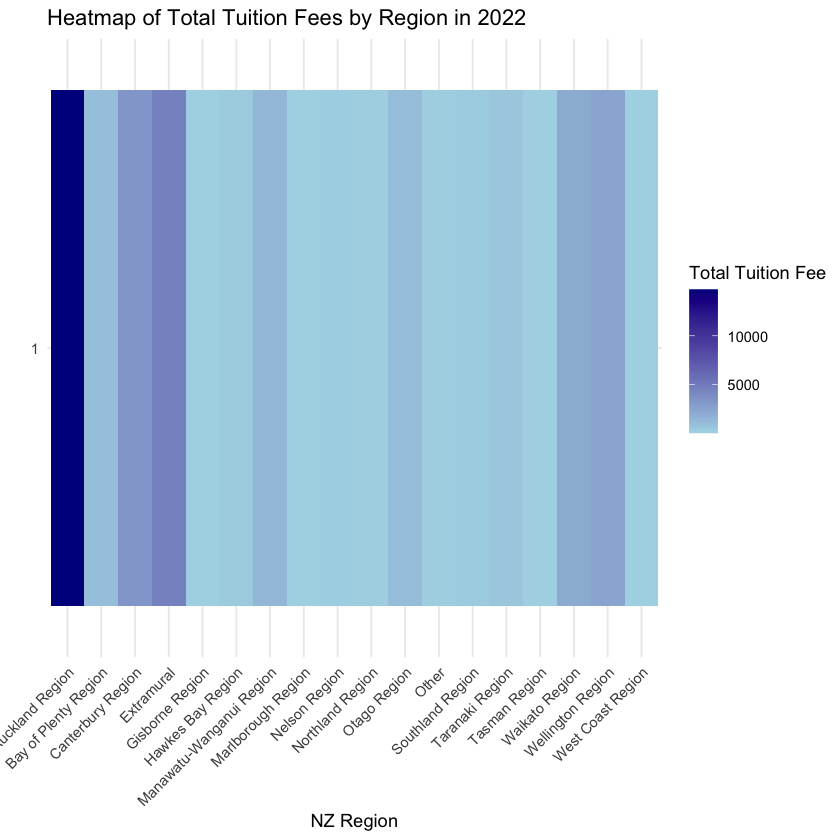

In [28]:
# Create a ggplot object
heatmap_plot <- ggplot(long, aes(x = nz_region, y = factor(1), fill = as.numeric(Totoal_Tuition))) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "darkblue",name = "Total Tuition Fee") +  # Customize colors
  labs(x = "NZ Region", y = "") +  # Customize axis labels
  ggtitle("Heatmap of Total Tuition Fees by Region in 2022") +  # Add a title
  theme_minimal() +  # Customize the plot theme
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          # Set background color to white
    plot.background = element_rect(fill = "white", color = NA)) 
# Save the plot as an image 
ggsave("heatmap.png", plot = heatmap_plot, width = 10, height = 6)

# Display the plot
heatmap_plot


### internatinal-travel 

In [29]:
file_path <- "international-travel-june-2020.xlsx"
data <- read_excel(file_path, sheet = "Table 1")
data <- as_tibble(data)

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [30]:
total_rows <- nrow(data)
print(data, n=total_rows)

# A tibble: 46 × 15
   `Table 1`   ...2  ...3  ...4  ...5  ...6  ...7  ...8  ...9  ...10 ...11 ...12
   <chr>       <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 Internatio… NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 2 By directi… NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 3 Period      Stat… Arri… NA    NA    NA    NA    NA    Depa… NA    NA    NA   
 4 NA          NA    Inte… NA    NA    Outc… NA    Tota… Inte… NA    NA    Outc…
 5 NA          NA    Over… NZ-r… Resi… Shor… Long… NA    Over… NZ-r… Resi… Shor…
 6 Series ref… NA    SVAZA SRAZA NA    NA    SEMA… STZAA SVDZA SRDZA NA    NA   
 7 June month  NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 8 2010        F     1458… 1641… 5201  3084… 6709  3151… 1336… 1988… 5934  3301…
 9 2011        F     1312… 1686… 5436  2988… 6585  3053… 1264… 1924… 6927  3166…
10 2012        F     1510… 1734… 6049  3233… 7273  3305… 1381… 2210… 7078  3568…
11 2013 

In [31]:
glimpse(data)

Rows: 46
Columns: 15
$ `Table 1` <chr> "International travel and migration summary", "By direction …
$ ...2      <chr> NA, NA, "Status of estimated migration(1)", NA, NA, NA, NA, …
$ ...3      <chr> NA, NA, "Arrivals", "Intentions-based measure(2)", "Overseas…
$ ...4      <chr> NA, NA, NA, NA, "NZ-resident travellers(5)", "SRAZA", NA, "1…
$ ...5      <chr> NA, NA, NA, NA, "Residual(6)", NA, NA, "5201", "5436", "6049…
$ ...6      <chr> NA, NA, NA, "Outcomes-based measure(3)", "Short-term movemen…
$ ...7      <chr> NA, NA, NA, NA, "Long-term movements (migrant arrivals)(7)",…
$ ...8      <chr> NA, NA, NA, "Total movements(8)", NA, "STZAA", NA, "315185",…
$ ...9      <chr> NA, NA, "Departures", "Intentions-based measure(2)", "Overse…
$ ...10     <chr> NA, NA, NA, NA, "NZ-resident travellers(10)", "SRDZA", NA, "…
$ ...11     <chr> NA, NA, NA, NA, "Residual(6)", NA, NA, "5934", "6927", "7078…
$ ...12     <chr> NA, NA, NA, "Outcomes-based measure(3)", "Short-term movemen…
$ ...13     <chr> N

In [32]:
# Year ended June
data <- data[(21:31), ]

In [33]:
# Arrivals
data_Arrivals <- data %>% select(1:8)

names(data_Arrivals) <- c("Period", "Status", "OverseasVisitors", "NZResidents", "Residual", "Short-term movements", "Long-term movements", "Total movements")

# data_Arrivals <- data_Arrivals %>% select_if(~!all(is.na(.)))

data_Arrivals <- data_Arrivals %>%
  mutate_at(vars(-"Status"), as.integer)

# glimpse(data_Arrivals)

options(data_Arrivals.width = Inf)

data_Arrivals %>%
  select_all() %>%
  print()

# A tibble: 11 × 8
   Period Status OverseasVisitors NZResidents Residual `Short-term movements`
    <int> <chr>             <int>       <int>    <int>                  <int>
 1   2010 F               2501264     1965101    82305                4446884
 2   2011 F               2501303     2078575    84016                4562868
 3   2012 F               2635726     2133887    84402                4753049
 4   2013 F               2636896     2182967    88235                4801776
 5   2014 F               2786826     2279597   100784                5046669
 6   2015 F               2991854     2390007   115655                5361572
 7   2016 F               3310390     2537045   125055                5826154
 8   2017 F               3648204     2749666   131355                6384471
 9   2018 F               3786927     2920193   129536                6695705
10   2019 P               3889798     3073219   111969                6933345
11   2020 P               2919122     2323853

In [35]:
# Departures
data_Departures <- data %>% select(1, 2, 9:14)

names(data_Departures) <- c("Period", "Status", "OverseasVisitors", "NZResidents", "Residual", "Short-term movements", "Long-term movements", "Total movements")

data_Arrivals <- data_Arrivals %>% select_if(~!all(is.na(.)))

data_Departures <- data_Departures %>%
  mutate_at(vars(-"Status"), as.integer)

glimpse(data_Departures)

options(data_Departures = Inf)

data_Departures %>%
  select_all() %>%
  print()

Rows: 11
Columns: 8
$ Period                 <int> 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,…
$ Status                 <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "P…
$ OverseasVisitors       <int> 2513574, 2527812, 2648286, 2655934, 2839951, 30…
$ NZResidents            <int> 1968175, 2066696, 2153586, 2140653, 2236607, 23…
$ Residual               <int> 65801, 80149, 87593, 80328, 62446, 57396, 55965…
$ `Short-term movements` <int> 4454655, 4564358, 4774001, 4771422, 5051522, 53…
$ `Long-term movements`  <int> 92895, 110299, 115464, 105493, 87482, 83255, 82…
$ `Total movements`      <int> 4547550, 4674657, 4889465, 4876915, 5139004, 54…
# A tibble: 11 × 8
   Period Status OverseasVisitors NZResidents Residual `Short-term movements`
    <int> <chr>             <int>       <int>    <int>                  <int>
 1   2010 F               2513574     1968175    65801                4454655
 2   2011 F               2527812     2066696    80149                4564358
 3   2012

Saving 7 x 7 in image


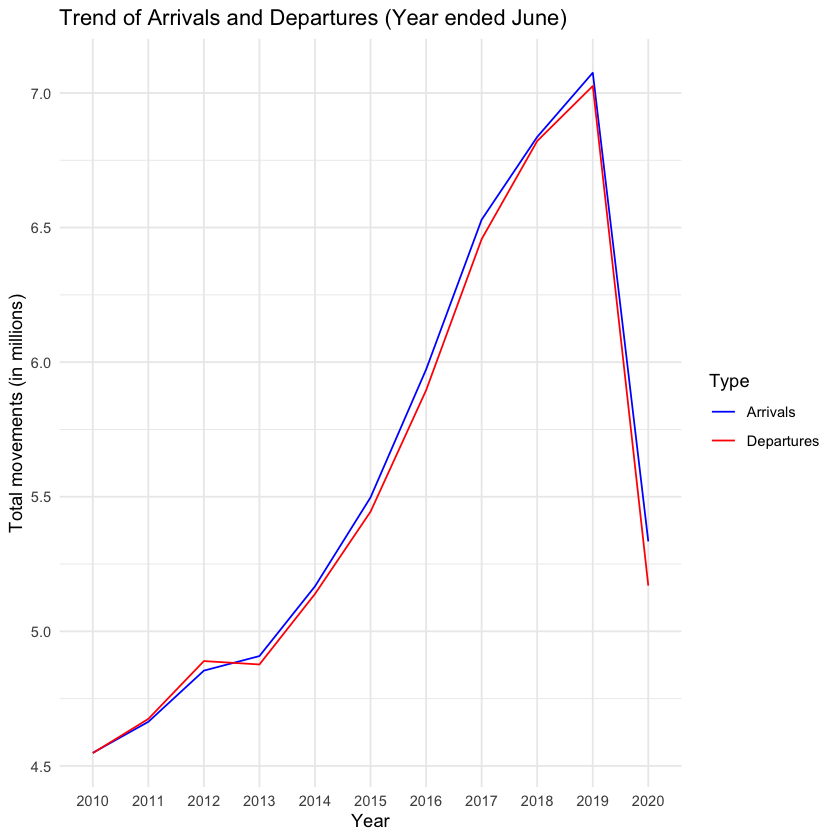

In [38]:
# Merge two data frames
combined_data <- bind_rows(
  data_Arrivals %>% select(Period, `Total movements`) %>% mutate(Type = "Arrivals"),
  data_Departures %>% select(Period, `Total movements`) %>% mutate(Type = "Departures")
)

# Convert Total movements to millions of units
combined_data$`Total movements` <- combined_data$`Total movements` / 1e6

plot_Trend<- ggplot(combined_data, aes(x = factor(Period), y = `Total movements`, color = Type, group = Type)) +
  geom_line() +
  labs(title = "Trend of Arrivals and Departures (Year ended June)", 
       x = "Year", 
       y = "Total movements (in millions)") +
  theme_minimal() +
  scale_color_manual(values = c("Arrivals" = "blue", "Departures" = "red"))
plot_Trend
ggsave(plot_Trend,filename = "Trend of Arrivals and Departures.jpg")

Saving 7 x 7 in image


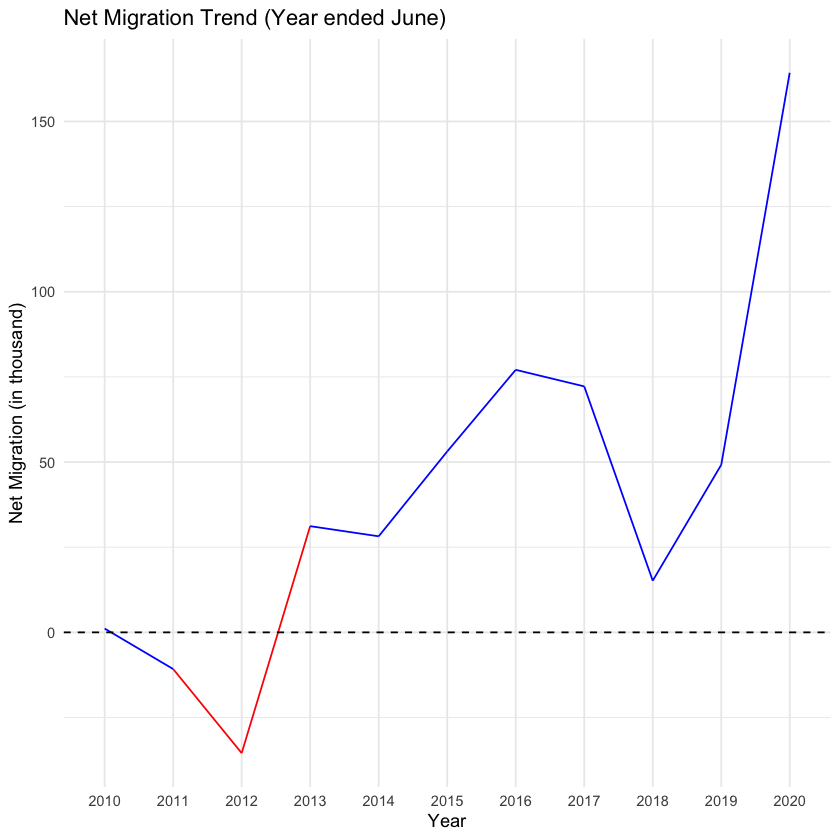

In [40]:
# The net difference between the total number of people entering and leaving New Zealand, including travelers and immigrants.
net_migration <- data_Arrivals %>% 
  select(Period, Arrivals = `Total movements`) %>%
  left_join(data_Departures %>% select(Period, Departures = `Total movements`), by = "Period") %>%
  mutate(NetMigration = Arrivals - Departures)

# Convert Total movements to thousands units
net_migration$`NetMigration` <- net_migration$`NetMigration` / 1000

Net_trend<-ggplot(net_migration, aes(x = factor(Period), y = NetMigration)) +
  geom_line(group = 1, color = ifelse(net_migration$NetMigration >= 0, "blue", "red")) +
  geom_hline(yintercept = 0, linetype = "dashed") + 
  labs(title = "Net Migration Trend (Year ended June)", 
       x = "Year", 
       y = "Net Migration (in thousand)") +
  theme_minimal()
Net_trend
ggsave(Net_trend,filename = "Net Migration Trend (Year ended June).jpg")